In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/My Drive/kds/1sem/ditw/ditw_project')

In [3]:
!pip install sentence_transformers
!pip install hdbscan
!pip install umap-learn
!pip install matplotlib
!pip install pandas

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 78 kB 3.2 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3.1 MB 12.5 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3.3 MB 40.6 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1.2 MB 37.9 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 61 kB 521 kB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 596 kB 48.6 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 895 kB 58.0 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.1.0-py3-none-any.whl size=121000 sha256=c41d3da404394882d0e08fb01e539cd8e3

In [19]:
from src.json_utils import read_json, read_jsonl
from sentence_transformers import SentenceTransformer
import hdbscan
import umap
import matplotlib.pyplot as plt
import pandas as pd
from src.preprocessing import *
from sklearn.cluster import DBSCAN
from collections import Counter
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import TweetTokenizer

In [5]:
data = read_jsonl('data/dkpol_tweets.jsonl')
df = pd.DataFrame(data)
df[df['in_reply_to_user_id'].isna()]
df.created_at = pd.to_datetime(df.created_at)
sub = df[['created_at', 'text', 'entities']].groupby(df.created_at.dt.to_period("M")).head(350)
#sub = df.groupby(df.created_at.dt.to_period("M")).head(100)
df = sub
text = df['text']
len(df)

Reading data/dkpol_tweets.jsonl


/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimes.py:1092: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


7350

In [6]:
text_without_processing = replace_url(df['text'], replacement = 'URL')

In [7]:
encoder = SentenceTransformer('Maltehb/danish-bert-botxo')
embeddings = encoder.encode(text_without_processing, show_progress_bar=True)

Downloading:   0%|          | 0.00/512 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.31k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/662 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.38k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.63M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/445M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/72.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/253k [00:00<?, ?B/s]

Some weights of the model checkpoint at /root/.cache/torch/sentence_transformers/Maltehb_danish-bert-botxo were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Batches:   0%|          | 0/230 [00:00<?, ?it/s]

In [8]:
umap_embeddings = umap.UMAP(n_neighbors=15, 
                            n_components=10, 
                            metric='cosine').fit_transform(embeddings)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [9]:
cluster = hdbscan.HDBSCAN(min_cluster_size=10,
                          metric='euclidean',                      
                          cluster_selection_method='eom',
                          cluster_selection_epsilon=0.5).fit(umap_embeddings)

In [12]:
print(Counter(cluster.labels_))

Counter({18: 6319, 16: 365, 5: 164, 14: 69, 1: 56, 10: 50, 4: 47, -1: 37, 9: 28, 6: 26, 12: 25, 11: 24, 3: 22, 15: 22, 2: 21, 7: 21, 0: 16, 13: 14, 8: 13, 17: 11})


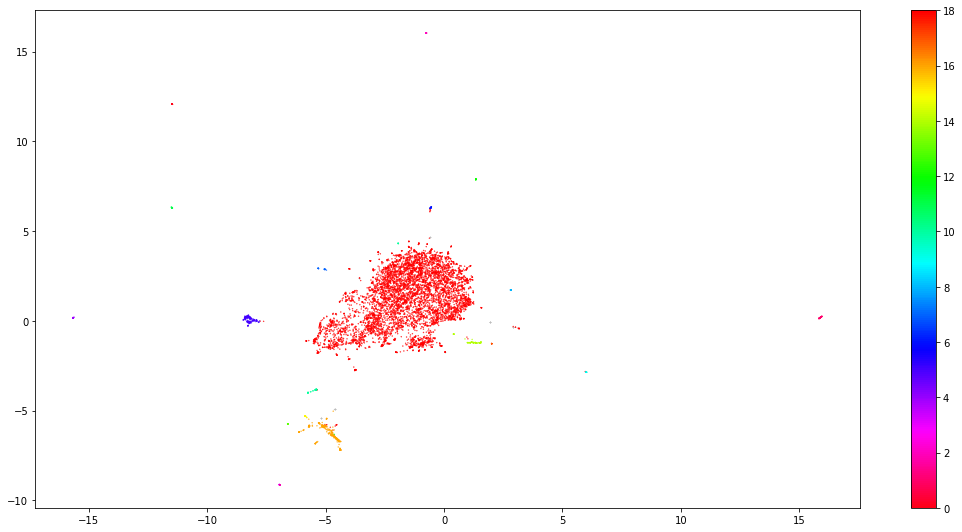

In [13]:
# Prepare data
umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = cluster.labels_

# Visualize clusters
fig, ax = plt.subplots(figsize=(15, 7.5))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=0.15)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=0.15, cmap='hsv_r')
plt.colorbar()
plt.tight_layout()

In [20]:
with open('data/danish_stopwords.txt') as stop_file:
  stopwords = [word.strip() for word in stop_file.readlines()]

def remove_stopwords(token: str) -> str:
    return token if token not in stopwords else ''

def remove_newlines(text: str) -> str:
    return re.sub(r'\n+', ' ', text)

def remove_numbers(text, str) -> str:
    return re.sub(r'\d+', '', text)


def normalize_spaces(text: str) -> str:
    return re.sub(r'\s{2,}', ' ', text)

import string 
    
def remove_punctuation(text: str) -> str:
    """BUT DO NOT REMOVE HASHTAGS OR MENTIONS"""
    regexp = re.compile(r'([#@]\w+)')
    return text if regexp.search(text) else re.sub(f'[{string.punctuation}]', '', text)


def is_website_token(token: str) -> str:
    if token[:4] == 'http':
        return ''
    else:
        return token

def remove_standalone_numbers(text: str) -> str:
    return re.sub(f'(?<!\S)\d+(?!\S)', '', text)

def split_by_space(text: str) -> List[str]:
    return text.split(' ')

In [21]:
tweet_tokenizer = TweetTokenizer().tokenize
tokenizer = TweetTokenizer()

text_list = list(text.values)

tokenized_text = [[token for token in tokenizer.tokenize(i)] for i in text_list]

print(tokenized_text[:2])

preprocessing_func = [remove_punctuation, str.lower, is_website_token, remove_stopwords, remove_standalone_numbers]

all_tokenizer_text = []

for token_text in tokenized_text:
    post_processed = []
    for token in token_text:
        for function in preprocessing_func:
            token = function(token)
        if token != '':
            post_processed.append(token)
    all_tokenizer_text.append(' '.join(post_processed))

print(all_tokenizer_text[:2])
print(len(all_tokenizer_text))

[['Det', 'er', 'p√•', 'tide', 'k√∏repr√∏ver', 'kommer', 'i', 'konkurrence', 'og', 'p√•', 'private', 'h√¶nder', '.', 'Ligesom', 'med', 'bilsyn', '.', 'V√¶k', 'med', 'ventetider', 'og', 'styrket', 'kvaliteten', '.', '#dkpol', 'https://t.co/YfmAvrkwQu'], ['Min', 'klumme', 'i', '@berlingske', '"', 'I', 'utallige', '√•r', ',', 'is√¶r', 'op', 'til', 'valgkampe', ',', 'har', 'der', 'v√¶ret', 'fokus', 'p√•', 'jobcentrene', 'og', 'besk√¶ftigelsesindsatsen', '.', 'Guld', 'og', 'gr√∏nne', 'skove', 'er', 'lovet', ',', 'men', 'alt', 'er', 'lige', 's√•', 'gudsforladt', 'og', 'dysfunktionelt', 'som', 'altid', '.', '"', '#dkpol', '#dkmedier', 'https://t.co/GsZjYE2rGl']]
['tide k√∏repr√∏ver konkurrence private h√¶nder bilsyn v√¶k ventetider styrket kvaliteten #dkpol', 'klumme @berlingske utallige √•r is√¶r valgkampe fokus jobcentrene besk√¶ftigelsesindsatsen guld gr√∏nne skove lovet gudsforladt dysfunktionelt #dkpol #dkmedier']
7350


In [22]:
print(len(all_tokenizer_text))
print(len(list(text.values)))

7350
7350


In [ ]:
docs_df = pd.DataFrame(all_tokenizer_text , columns=["Doc"])
docs_df['Original Docs'] = list(text.values)
docs_df['Topic'] = cluster.labels_
docs_df['Doc_ID'] = range(len(docs_df))
docs_per_topic = docs_df.groupby(['Topic'], as_index = False).agg({'Doc': ' '.join})

### Tf-idf on docs from each cluster

In [ ]:
docs_per_topic.loc[docs_per_topic['Topic'] == 17]['Doc'].values[0][:200]

'tide k√∏repr√∏ver konkurrence private h√¶nder bilsyn v√¶k ventetider styrket kvaliteten #dkpol klumme @berlingske utallige √•r is√¶r valgkampe fokus jobcentrene besk√¶ftigelsesindsatsen guld gr√∏nne skove lov'

In [ ]:
docs_df.loc[docs_df['Topic'] == 17].sample(20)['Original Docs'].values

array(['Flemming Chr. Nielsen p√• Facebook #dkpol #dkmedier https://t.co/es0YvL7AIs',
       '@J_Seb_ Danske dommere er slappe som en karklud\n\nIS-krigerne bliver l√∏sladt eller f√•r en latterlig lav straf s√• snart de kommer til DK\n\nDerefter er det fri bolig sociale ydelser og familiesammenf√∏ring hele vejen\n\nTag jer sammen #dkpol',
       'Jeg er ik helt enig, men vi skal se os godt for i disse m√•neder. Ekstrem h√∏jre er ekstremt aktive ogs√• internationalt #dkpol https://t.co/gSAMq06uNB',
       '@Pia_Kjaersgaard N√¶h, Pia. Egede tvangskristnede inuitter. N√∏jagtig det samme du frygter med tvangsislamisering i Danmark ...\n#dkpol',
       '@Susanne_Zimmer_ Alts√• i #dkpol g√•r det mega fint at g√∏re hvad som helst modsat - hvem skulle dog standse det? Er der nogen der g√•r p√• gaden i demonstration, ses h√∏tyve eller fakler, gabestokke eller guillotiner? Er selv meningsm√•linger ikke n√¶rmest underst√∏ttende vanvid, destruktion og had?',
       'Vi er begejstrede for mange tin

In [27]:
def c_tf_idf(documents, m, ngram_range=(1, 3)):
    count = CountVectorizer(tokenizer = split_by_space, stop_words = None, ngram_range = (1,1)).fit(documents)
    t = count.transform(documents).toarray()
    w = t.sum(axis=1)
    tf = np.divide(t.T, w)
    sum_t = t.sum(axis=0)
    idf = np.log(np.divide(m, sum_t)).reshape(-1, 1)
    tf_idf = np.multiply(tf, idf)

    return tf_idf, count
  
#tf_idf, count = c_tf_idf(docs_per_topic.Doc.values, m=len(data))

In [25]:
def extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=30):
    words = count.get_feature_names()
    labels = list(docs_per_topic.Topic)
    tf_idf_transposed = tf_idf.T
    indices = tf_idf_transposed.argsort()[:, -n:]
    top_n_words = {label: [(words[j], tf_idf_transposed[i][j]) for j in indices[i]][::-1] for i, label in enumerate(labels)}
    return top_n_words

def extract_topic_sizes(df):
    topic_sizes = (df.groupby(['Topic'])
                     .Doc
                     .count()
                     .reset_index()
                     .rename({"Topic": "Topic", "Doc": "Size"}, axis='columns')
                     .sort_values("Size", ascending=False))
    return topic_sizes

#top_n_words = extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=30)
#top_n_words
#topic_sizes = extract_topic_sizes(docs_df); topic_sizes.head(10)

In [ ]:
len(top_n_words)
top_n_words[15]

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

for i in range(8):
    # Calculate cosine similarity
    similarities = cosine_similarity(tf_idf.T)
    np.fill_diagonal(similarities, 0)

    # Extract label to merge into and from where
    topic_sizes = docs_df.groupby(['Topic']).count().sort_values("Doc", ascending=False).reset_index()
    topic_to_merge = topic_sizes.iloc[-1].Topic
    topic_to_merge_into = np.argmax(similarities[topic_to_merge + 1]) - 1

    # Adjust topics
    docs_df.loc[docs_df.Topic == topic_to_merge, "Topic"] = topic_to_merge_into
    old_topics = docs_df.sort_values("Topic").Topic.unique()
    map_topics = {old_topic: index - 1 for index, old_topic in enumerate(old_topics)}
    docs_df.Topic = docs_df.Topic.map(map_topics)
    docs_per_topic = docs_df.groupby(['Topic'], as_index = False).agg({'Doc': ' '.join})

    # Calculate new topic words
    m = len(data)
    tf_idf, count = c_tf_idf(docs_per_topic.Doc.values, m)
    top_n_words = extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20)

In [ ]:
# Get topic ids of alle clusters with more than 200 documents
topic_subset = topic_sizes[topic_sizes.Doc > 100]
topic_subset = list(topic_subset.Topic.values)

In [ ]:
print(topic_subset)
len(top_n_words)
print(topic_sizes.head(20))
print(top_n_words.keys())

### Reduce large clusters

Counter({38: 1838, 34: 812, 20: 677, 28: 362, 30: 361, -1: 354, 15: 339, 27: 289, 10: 260, 14: 123, 19: 122, 11: 100, 37: 61, 24: 42, 6: 42, 25: 39, 36: 38, 17: 36, 18: 35, 31: 35, 22: 32, 12: 30, 29: 25, 23: 22, 9: 22, 5: 20, 8: 18, 33: 18, 21: 16, 26: 16, 35: 16, 4: 14, 3: 14, 0: 14, 7: 14, 2: 14, 32: 13, 16: 13, 13: 12, 1: 11})


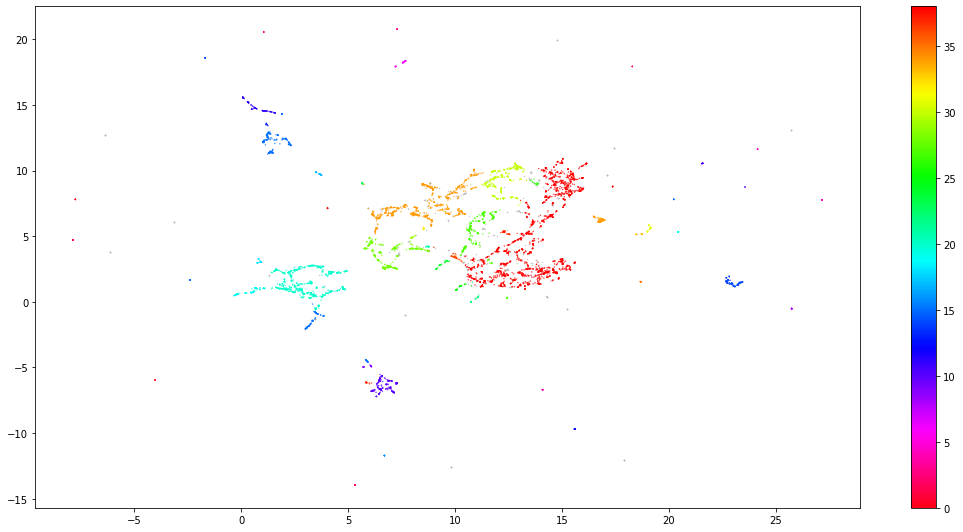

In [23]:
# Reduce large clusters

# Get large cluster idx
large_cluster_idx = [idx for idx, label in enumerate(cluster.labels_) if label == 18]
large_cluster_embeddings = umap_embeddings[large_cluster_idx,:]

# Reduce dim
large_umap_embeddings = umap.UMAP(n_neighbors=15, 
                            n_components=5, 
                            metric='cosine').fit_transform(large_cluster_embeddings)


large_cluster = hdbscan.HDBSCAN(min_cluster_size=10,
                          metric='euclidean',                      
                          cluster_selection_method='eom',
                          cluster_selection_epsilon=0.5).fit(large_umap_embeddings)

print(Counter(large_cluster.labels_))

# Prepare data
large_umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(large_cluster_embeddings)
large_result = pd.DataFrame(large_umap_data, columns=['x', 'y'])
large_result['labels'] = large_cluster.labels_

# Visualize clusters
fig, ax = plt.subplots(figsize=(15, 7.5))
outliers = large_result.loc[large_result.labels == -1, :]
clustered = large_result.loc[large_result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=0.15)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=0.15, cmap='hsv_r')
plt.colorbar()
plt.tight_layout()

In [28]:
docs_df = pd.DataFrame([all_tokenizer_text[i] for i in large_cluster_idx] , columns=["Doc"])
docs_df['Original Docs'] = [list(text.values)[i] for i in large_cluster_idx]
docs_df['Topic'] = large_cluster.labels_
docs_df['Doc_ID'] = range(len(docs_df))
docs_per_topic = docs_df.groupby(['Topic'], as_index = False).agg({'Doc': ' '.join})

tf_idf, count = c_tf_idf(docs_per_topic.Doc.values, m=len(data))

top_n_words = extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=30)
top_n_words
topic_sizes = extract_topic_sizes(docs_df); topic_sizes.head(10)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Topic  Size
39     38  1838
35     34   812
21     20   677
29     28   362
31     30   361
0      -1   354
16     15   339
28     27   289
11     10   260
15     14   123

In [35]:
docs_df.head()

Doc  ... Doc_ID
0  tide k√∏repr√∏ver konkurrence private h√¶nder bil...  ...      0
1  klumme @berlingske utallige √•r is√¶r valgkampe ...  ...      1
2     @stinekbh ret derimod f√¶llestr√¶k mobber #dkpol  ...      2
3  pige t√¶t d√∏ pga farlige leget√∏jsmagneter k√∏bt ...  ...      3
4  morgen gruppe folketingsmedlemmer tager warsza...  ...      4

[5 rows x 4 columns]

In [40]:
top_n_words[14]

[('#dkpol', 0.5172926973203087),
 ('#dkmedier', 0.1677657852550967),
 ('@europabev', 0.15332062827324086),
 ('ü§î', 0.1379668312946638),
 ('#eupol', 0.09553183990070943),
 ('üèº', 0.0916657419937732),
 ('#covid19', 0.08413571153254092),
 ('#dkgreen', 0.08070978853783661),
 ('üôÑ', 0.07617431363673006),
 ('üëè', 0.07484145463247431),
 ('yeah', 0.06542071387523135),
 ('#itpol', 0.06418043117595276),
 ('host', 0.06222341027492023),
 ('üëç', 0.05788641364197715),
 ('üá∫', 0.05670687819181595),
 ('#dkklima', 0.055039378477305854),
 ('\u2069', 0.05475162507917571),
 ('üá™', 0.05474985729078343),
 ('\u2066', 0.05420282813072698),
 ('üòÇ', 0.05144708303376506),
 ('¬ª', 0.048184681127221615),
 ('¬´', 0.04786821843582778),
 ('l√¶s', 0.046731796091180396),
 ('#velf√¶rd', 0.04666755770619017),
 ('be', 0.04419047701342639),
 ('@politikdr', 0.04419047701342639),
 ('of', 0.04346037066832091),
 ('#sundpol', 0.04305063300777006),
 ('tr√•d', 0.04282178320426986),
 ('#dkbiz', 0.040463729203146885